In [20]:
import csv
import numpy as np
import pandas as pd
import psycopg2
import math
import matplotlib.pyplot as plt
from matplotlib import colors

def my_select_query_pandas(query, rollback_before_flag, rollback_after_flag):
    "function to run a select query and return rows in a pandas dataframe"
    
    if rollback_before_flag:
        connection.rollback()
    
    df = pd.read_sql_query(query, connection)
    
    if rollback_after_flag:
        connection.rollback()
    
    # fix the float columns that really should be integers
    
    for column in df:
    
        if df[column].dtype == "float64":

            fraction_flag = False

            for value in df[column].values:
                
                if not np.isnan(value):
                    if value - math.floor(value) != 0:
                        fraction_flag = True

            if not fraction_flag:
                df[column] = df[column].astype('Int64')
    
    return(df)


#connect to postgres database
connection = psycopg2.connect(
    user = "postgres",
    password = "ucb",
    host = "postgres",
    port = "5432",
    database = "postgres"
)
# create cursor for connections
cursor = connection.cursor()

In [43]:
# customer quantity histogram
query = """

SELECT l.quantity, count(quantity), 
    FROM line_items as l
    JOIN stores as s
        ON l.store_id = s.store_id
WHERE s.city = 'Berkeley'
GROUP BY quantity
ORDER BY quantity

"""
order_quantity = my_select_query_pandas(query, True, True) #.style.set_caption("AGM's Average Daily Sales")
order_quantity

,quantity,count
0,1,881323
1,2,335117
2,3,113941
3,4,34238
4,5,8532
5,6,1883
6,7,304
7,8,41
8,9,1


In [44]:
# customer base distance histogram
query = """

SELECT c.distance, count(c.customer_id)
    FROM customers as c
        JOIN stores as s
        ON c.closest_store_id = s.store_id
WHERE s.city = 'Berkeley'
GROUP BY c.distance
ORDER BY c.distance

"""
customer_dist = my_select_query_pandas(query, True, True) #.style.set_caption("AGM's Average Daily Sales")
customer_dist

,distance,count
0,1,791
1,2,593
2,3,746
3,4,799
4,5,519
5,6,569
6,7,375
7,8,429
8,9,548
9,10,533


In [46]:
# histogram of order distances
query = """

SELECT c.distance, count(s.sale_id)
    FROM customers as c
        JOIN sales as s
        ON s.customer_id = c.customer_id
        JOIN stores as st
        ON c.closest_store_id = st.store_id
WHERE st.city = 'Berkeley'
GROUP BY c.distance
ORDER BY c.distance

"""
order_dist = my_select_query_pandas(query, True, True) #.style.set_caption("AGM's Average Daily Sales")


<AxesSubplot:title={'center':'Count of Order Quantities in Sales Database'}, xlabel='quantity', ylabel='count'>

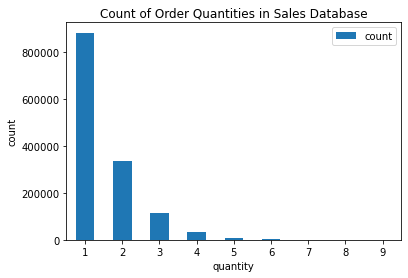

In [50]:

order_quantity.plot.bar(x = 'quantity', y = 'count',
                       title = "Count of Order Quantities in Sales Database",
                       ylabel = "count",
                       rot=0)

<AxesSubplot:title={'center':'Count of Customer Distances in Customer Database'}, xlabel='distance (miles)', ylabel='count'>

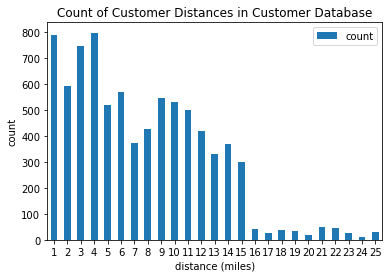

In [51]:
customer_dist.plot.bar(x = 'distance', y = 'count',
                       title = "Count of Customer Distances in Customer Database",
                       ylabel = "count",
                       xlabel = "distance (miles)",
                       rot=0)

<AxesSubplot:title={'center':'Count of Order Distances in Sales Database'}, xlabel='distance (miles)', ylabel='count'>

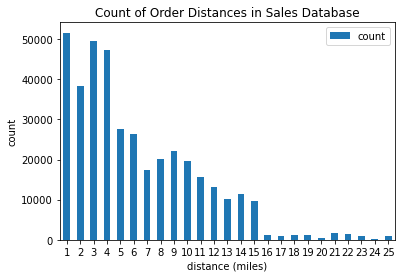

In [52]:
order_dist.plot.bar(x = 'distance', y = 'count',
                       title = "Count of Order Distances in Sales Database",
                       ylabel = "count",
                       xlabel = "distance (miles)",
                       rot=0)